<a href="https://colab.research.google.com/github/ThangDoan2001/TensorFlow_ZeroToHero/blob/master/01_neural_network_regression_with_tensorflow_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1.Create your own regression dataset and build fit a model to it**



In [1]:
import tensorflow as tf
import numpy as np
tf.__version__

'2.5.0'

In [2]:
# Create regression data set
X = np.arange(-200, 200, 2)
y = X*X + 100


In [3]:
# Split dataset into training_data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(y_train)

(160, 160)

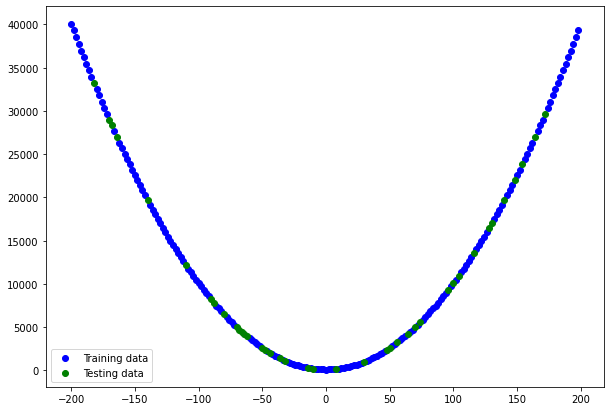

In [4]:
# Visualization input data
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot testing data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend()


In [5]:
# Create a plotting function with prediction 
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions):
  plt.figure(figsize=(10, 7))
  # Plot trainig data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions") 
  # Show a legend
  plt.legend()


In [6]:
# Let's build our first model with 1 hidden layers, optimizer SGD and train with epochs = 100
tf.random.set_seed(42)
# 1. Build a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])
], name="model_1")

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 3s 3ms/step - loss: 14118.3066 - mae: 14118.3066
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 14120.1748 - mae: 14120.1748
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 14118.4814 - mae: 14118.4814
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 14119.3535 - mae: 14119.3535
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 14117.7051 - mae: 14117.7051
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 14117.5703 - mae: 14117.5703
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 14118.0996 - mae: 14118.0996
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 14118.4033 - mae: 14118.4033
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 14117.0918 - mae: 14117.0918
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 14118.0654 - mae: 14118.0654

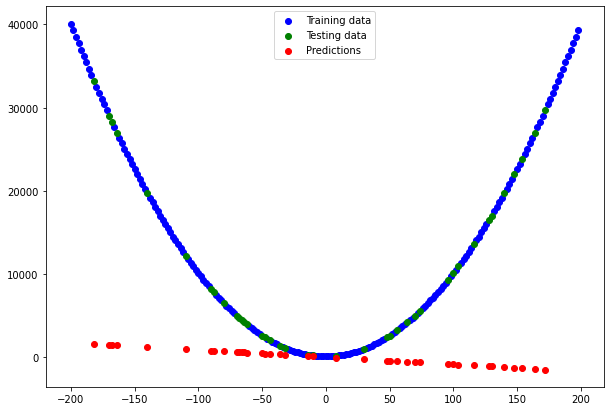

In [7]:
# Make and plot our model's prediction
y_preds_1 = model_1.predict(X_test)
plot_predictions(X_train,y_train, X_test, y_test, y_preds_1)

In [8]:
# Let's improve our model
tf.random.set_seed(42)
# 1. Build the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=[1]),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 14118.7734 - mae: 14118.7734
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 14125.4219 - mae: 14125.4219
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 14118.7012 - mae: 14118.7012
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 14121.0566 - mae: 14121.0566
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 14117.1074 - mae: 14117.1074
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 14116.5098 - mae: 14116.5098
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 14120.2002 - mae: 14120.2002
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 14118.5840 - mae: 14118.5840
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 14116.4404 - mae: 14116.4404
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 14118.5938 - mae: 14118.5938

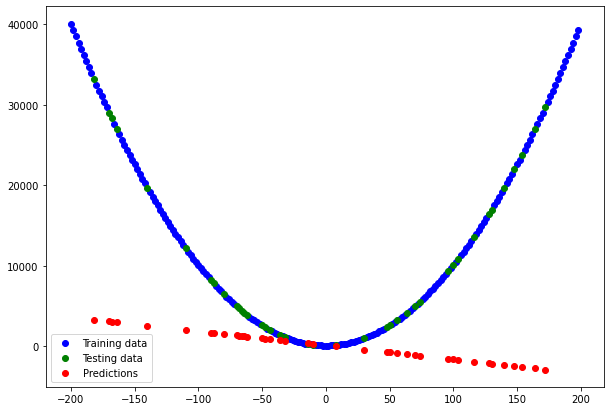

In [9]:
# Let's make and plot again
y_preds_2 = model_2.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_2)

In [10]:
model_2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 10617.7598 - mae: 10617.7598


[10617.759765625, 10617.759765625]

In [11]:
y_test.mean()

10702.8

In [12]:
# I will train for more time
tf.random.set_seed(42)
# 1. Build the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=[1]),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
history = model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 14118.7734 - mae: 14118.7734
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 14125.4219 - mae: 14125.4219
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 14118.7012 - mae: 14118.7012
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 14121.0566 - mae: 14121.0566
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 14117.1074 - mae: 14117.1074
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 14116.5098 - mae: 14116.5098
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 14120.2002 - mae: 14120.2002
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 14118.5840 - mae: 14118.5840
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 14116.4404 - mae: 14116.4404
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 14118.5938 - mae: 14118.5938

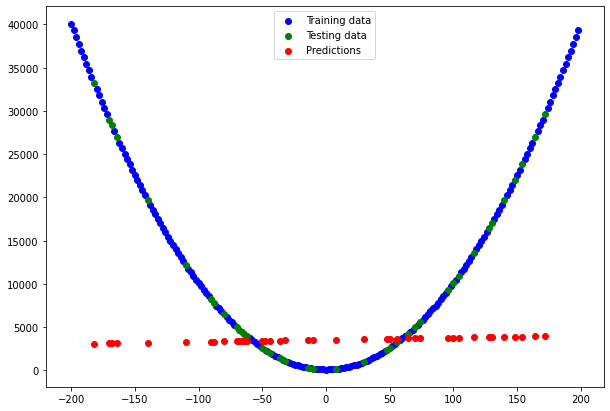

In [13]:
# Make and plot predictions of model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_3)

Text(0.5, 0, 'epochs')

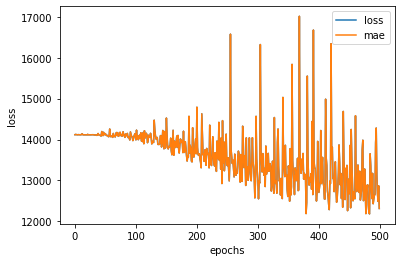

In [14]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [23]:
# Let's try again
tf.random.set_seed(42)
# 1. Build a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
], name="model_4")

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
history_4 = model_4.fit(X_train, y_train, epochs=500, verbose=0)

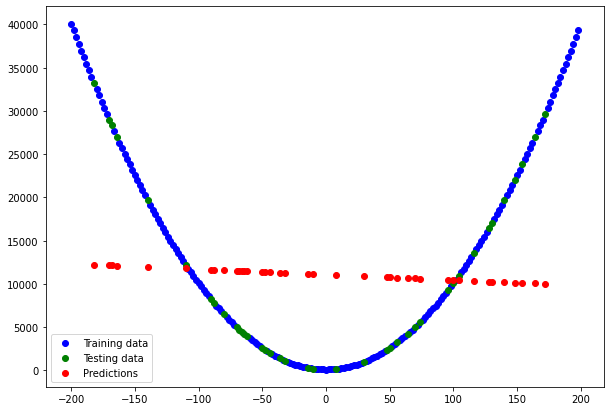

In [21]:
y_preds_4 = model_4.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_4)

In [22]:
model_4.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 8634.7598 - mae: 8634.7598


[8634.759765625, 8634.759765625]

Text(0.5, 0, 'epochs')

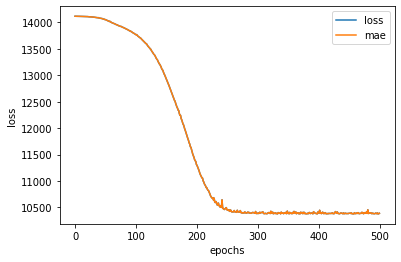

In [26]:
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [28]:
# Let's do again
tf.random.set_seed(42)
# 1. Build the model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1),
], name="model_5")

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

# 3. Fit the model
history_5 = model_5.fit(X_train, y_train, epochs=300, verbose=0)

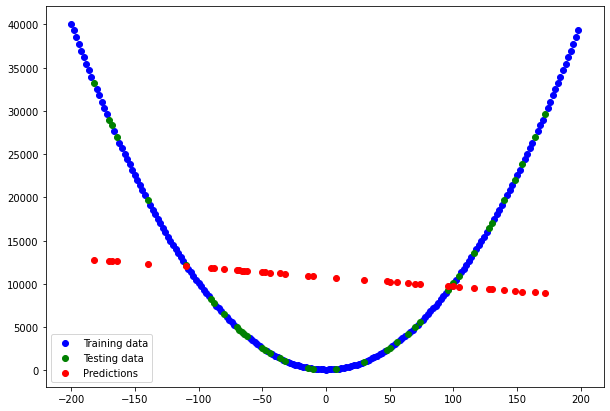

In [29]:
# Make and plot predictions of model_5
y_preds_5 = model_5.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_5)

Text(0.5, 0, 'epochs')

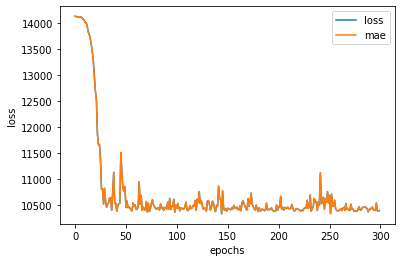

In [30]:
pd.DataFrame(history_5.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [31]:
# Evaluating the model
model_5.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 8650.2373 - mae: 8650.2373


[8650.2373046875, 8650.2373046875]

In [34]:
# Final I will add 1 more hidden layer
tf.random.set_seed(42)
# 1. Build the model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
], name="model_6")

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

# 3. Fit the model
history_6 = model_6.fit(X_train, y_train, epochs=500)

model_6.summary()

Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 14123.5879 - mae: 14123.5879
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 14119.7549 - mae: 14119.7549
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 14115.9561 - mae: 14115.9561
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 14115.1973 - mae: 14115.1973
Epoch 5/500
5/5 [==============================] - 0s 4ms/step - loss: 14114.3232 - mae: 14114.3232
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 14111.3750 - mae: 14111.3750
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 14115.8779 - mae: 14115.8779
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 14098.8457 - mae: 14098.8457
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 14079.8438 - mae: 14079.8438
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 14048.7246 - mae: 14048.7246

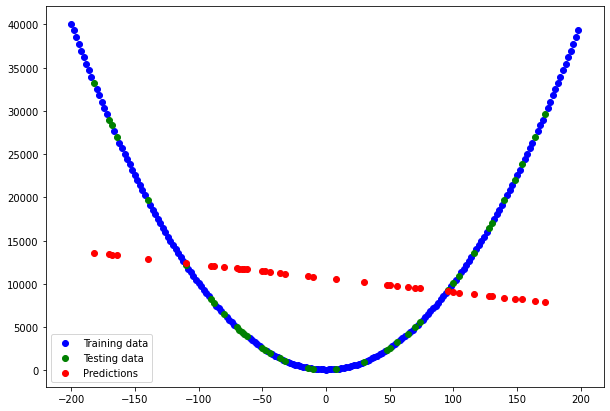

In [35]:
# Make and plot our last predictions
y_preds_6 = model_6.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_6)

Text(0.5, 0, 'epochs')

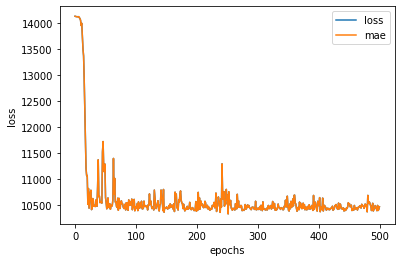

In [36]:
pd.DataFrame(history_6.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [37]:
model_6.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 8738.4902 - mae: 8738.4902


[8738.490234375, 8738.490234375]

In [43]:
np.mean(y_test)

10702.8

In [42]:
np.median(y_test)

6038.0

### 2. Try to improve the results we got on the insurance dataset, some things you might want to try include:

* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documantation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?

## Import our data and preprocessing data (normalization and standardization)


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# To prepare our data, we can borrow a few classes from Scikit-Learn

In [46]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Creat a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these column between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y values
X = insurance.drop("charges" , axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncode
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

# Another way to process our data

In [47]:
import pandas as pd
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [51]:
# Create X & y value (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [52]:
# Creating training and testing sets (using sklearn.model_selection)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

# Build our model for insurance data set

In [53]:
# First let's go with 4 hidden layers
tf.random.set_seed(42)
# 1. Build the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
], name="model_1")
# 2. Compile the model
model_1.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
# 3. Fit the model
history_1 = model_1.fit(X_train, y_train, epochs=200, verbose=0)

model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_43 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_44 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 11        
Total params: 12,321
Trainable params: 12,321
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Evaluate our first model
model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3161.4468 - mae: 3161.4468


[3161.44677734375, 3161.44677734375]

Text(0.5, 0, 'epochs')

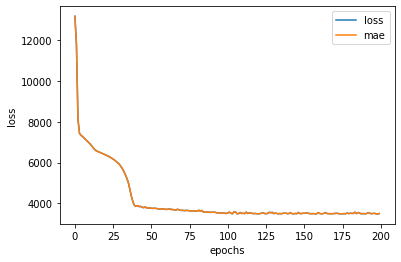

In [55]:
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [56]:
# Try again with model_2, this time I will increase learning_rate by 10 times
tf.random.set_seed(42)
# 1. Build the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
], name="model_2")
# 2. Compile the model
model_2.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])
# 3. Fit and summary the model
history_2 = model_2.fit(X_train, y_train, epochs=200, verbose=0)
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_47 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_48 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 11        
Total params: 12,321
Trainable params: 12,321
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Evaluate our model
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3184.9158 - mae: 3184.9158


[3184.915771484375, 3184.915771484375]

Text(0.5, 0, 'epochs')

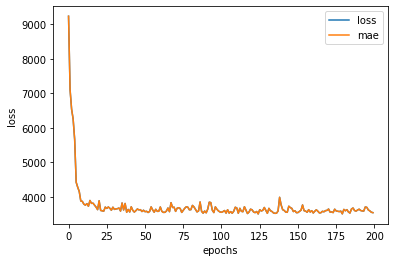

In [58]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [59]:
# Train for more time 300 epochs instead of 200 epochs
tf.random.set_seed(42)
# 1. Build the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
], name="model_3")
# 2. Compile the model
model_3.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])
# 3. Fit and summary the model
history_3 = model_3.fit(X_train, y_train, epochs=300, verbose=0)
model_3.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_51 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_52 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 11        
Total params: 12,321
Trainable params: 12,321
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Evaluate our model
model_3.evaluate(X_test, y_test)


9/9 [==============================] - 0s 2ms/step - loss: 3231.3386 - mae: 3231.3386


[3231.338623046875, 3231.338623046875]

Text(0.5, 0, 'epochs')

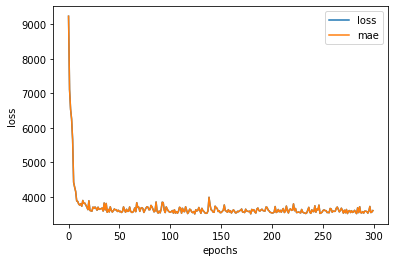

In [62]:
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")